In [1]:
import os
import sys
import IPython
import IPython.display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import collections
from datetime import datetime, timedelta

import plotly.graph_objs as go
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output

cell_type = "lg"
model_type = ""
base_path = '../../'

sys.path.append(base_path)
from training import utils

lg_data_path = base_path + 'datasets/Dataset_Li-ion'

resample_1hz = True
vi_averages = True

# Create datasets

In [2]:
lg_charge_cycles = ['Charge']

discharge_cycle = ['UDDS']

lg_n20_temps = ['n20degC']
lg_n20_discharge_cycles = discharge_cycle

lg_n10_temps = ['n10degC']
lg_n10_discharge_cycles = discharge_cycle

lg_0_temps = ['0degC']
lg_0_discharge_cycles = discharge_cycle

lg_10_temps = ['10degC']
lg_10_discharge_cycles = discharge_cycle

lg_25_temps = ['25degC']
lg_25_discharge_cycles = discharge_cycle

lg_40_temps = ['40degC']
lg_40_discharge_cycles = discharge_cycle

lg_n20_files = utils.lg_get_files(lg_data_path,
                                  lg_n20_discharge_cycles, 
                                  lg_charge_cycles,
                                  lg_n20_temps)


lg_n10_files = utils.lg_get_files(lg_data_path,
                                  lg_n10_discharge_cycles, 
                                  lg_charge_cycles,
                                  lg_n10_temps)

lg_0_files = utils.lg_get_files(lg_data_path,
                                lg_0_discharge_cycles, 
                                lg_charge_cycles,
                                lg_0_temps)

lg_10_files = utils.lg_get_files(lg_data_path,
                                 lg_10_discharge_cycles, 
                                 lg_charge_cycles,
                                 lg_10_temps)

lg_25_files = utils.lg_get_files(lg_data_path,
                                 lg_25_discharge_cycles, 
                                 lg_charge_cycles,
                                 lg_25_temps)

lg_40_files = utils.lg_get_files(lg_data_path,
                                 lg_40_discharge_cycles, 
                                 lg_charge_cycles,
                                 lg_40_temps)

lg_n20, lg_n20_norm = utils.lg_create_dataset(lg_n20_files,
                                              lg_n20_discharge_cycles,
                                              lg_charge_cycles,
                                              vi_averages, 
                                              resample_1hz)

lg_n10, lg_n10_norm = utils.lg_create_dataset(lg_n10_files,
                                              lg_n10_discharge_cycles,
                                              lg_charge_cycles,
                                              vi_averages, 
                                              resample_1hz)

lg_0, lg_0_norm = utils.lg_create_dataset(lg_0_files, 
                                          lg_0_discharge_cycles, 
                                          lg_charge_cycles,
                                          vi_averages, 
                                          resample_1hz)

lg_10, lg_10_norm = utils.lg_create_dataset(lg_10_files,
                                            lg_10_discharge_cycles, 
                                            lg_charge_cycles,
                                            vi_averages,
                                            resample_1hz)

lg_25, lg_25_norm = utils.lg_create_dataset(lg_25_files,
                                            lg_25_discharge_cycles, 
                                            lg_charge_cycles,
                                            vi_averages, 
                                            resample_1hz)

lg_40, lg_40_norm = utils.lg_create_dataset(lg_40_files,
                                            lg_40_discharge_cycles, 
                                            lg_charge_cycles,
                                            vi_averages, 
                                            resample_1hz)

../../datasets/Dataset_Li-ion/n20degC/610_UDDS.csv 81911
../../datasets/Dataset_Li-ion/n10degC/596_UDDS.csv 123602
../../datasets/Dataset_Li-ion/0degC/589_UDDS.csv 140435
../../datasets/Dataset_Li-ion/10degC/576_UDDS.csv 148898
../../datasets/Dataset_Li-ion/25degC/551_UDDS.csv 159646
../../datasets/Dataset_Li-ion/40degC/556_UDDS.csv 158956


In [3]:
print("dataset with 25degC")
lg_25

dataset with 25degC


Time Stamp  Voltage  Current  Temperature      Power  Capacity  \
0           4.17113  2.55922     23.97615  10.674839  0.954944   
1           4.17669  2.75078     23.97615  11.489155  0.955238   
2           4.16776  2.26039     23.97615   9.420763  0.955485   
3           4.15326  1.54779     23.97615   6.428374  0.955655   
4           4.14652  1.23108     23.97615   5.104698  0.955790   
...             ...      ...          ...        ...       ...   
14862       3.06052 -2.31911     24.71226  -7.097683  0.000552   
14863       3.05260 -2.32933     24.71226  -7.110513  0.000305   
14864       3.08968 -0.63852     24.71226  -1.972822  0.000162   
14865       3.14609  1.54779     24.71226   4.869487  0.000216   
14866       3.07502 -1.76998     24.60710  -5.442724  0.000178   

Time Stamp  Voltage Average  Current Average  Power Average  
0                  4.110299        -0.845544      -3.395760  
1                  4.110283        -0.839941      -3.372355  
2                  4.110252        -0.835226      -3.352701  
3                  4.110193        -0.831936      -3.339032  
4                  4.110120        -0.829280      -3.328011  
...                     ...              ...            ...  
14862              3.236221        -1.040483      -3.204078  
14863              3.235668        -1.044901      -3.217500  
14864              3.235190        -1.045943      -3.220663  
14865              3.234825        -1.042613      -3.210142  
14866              3.234318        -1.045918      -3.220246  

[14867 rows x 8 columns]

In [4]:
print("dataset with 25degC")
columns_of_interest = ['Voltage', 'Current', 'Temperature', 'Power', 'Capacity','Voltage Average','Current Average','Power Average']
descriptive_stats = lg_25[columns_of_interest].describe()

print(descriptive_stats)

dataset with 25degC
Time Stamp       Voltage       Current   Temperature         Power  \
count       14867.000000  14867.000000  14867.000000  14867.000000   
mean            3.741553     -0.601861     23.982004     -2.175776   
std             0.242104      1.566158      0.147075      5.756884   
min             2.907300     -9.166630     23.555510    -27.369006   
25%             3.558695     -1.409860     23.870990     -5.219313   
50%             3.753800     -0.400990     23.976150     -1.527155   
75%             3.954455     -0.068960     24.081300     -0.251528   
max             4.179050      5.177190     24.712260     17.408480   

Time Stamp      Capacity  Voltage Average  Current Average  Power Average  
count       14867.000000     14867.000000     14867.000000   14867.000000  
mean            0.506241         3.756763        -0.590817      -2.154806  
std             0.272122         0.231614         0.191499       0.680097  
min             0.000162         3.234318    

In [5]:
temp_datasets = {
    '-20degC': lg_n20 ,
    '-10degC': lg_n10 ,
    '0degC': lg_0,
    '10degC': lg_10,
    '25degC': lg_25,
    '40degC': lg_40
}

# Create a slider for selecting the temperature
temp_slider = widgets.SelectionSlider(
    options=['-20degC', '-10degC', '0degC', '10degC', '25degC', '40degC'],
    value='25degC',
    description='Temperature:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Function to update the plot based on the selected temperature
def update_plot(change):
    temp = change['new']
    data = temp_datasets[temp]
    
    fig = px.line(data, x=data.index, y='Current Average', title=f'Current vs Time at {temp}')
    fig.update_layout(xaxis_title='Time', yaxis_title='Current Average (A)')
    
    clear_output(wait=True)
    display(temp_slider);
    fig.show()

# Link the slider to the update function
temp_slider.observe(update_plot, names='value')

# Display the slider and the initial plot
display(temp_slider)
update_plot({'new': '25degC'})

SelectionSlider(continuous_update=False, description='Temperature:', index=4, options=('-20degC', '-10degC', '…

In [6]:
# Create a slider for selecting the temperature
temp_slider = widgets.SelectionSlider(
    options=['-20degC', '-10degC', '0degC', '10degC', '25degC', '40degC'],
    value='25degC',
    description='Temperature:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Function to update the plot based on the selected temperature
def update_plot(change):
    temp = change['new']
    data = temp_datasets[temp]
    
    fig = px.line(data, x=data.index, y='Voltage Average', title=f'Voltage vs Time at {temp}')
    fig.update_traces(line=dict(color='orange'))

    fig.update_layout(xaxis_title='Time', yaxis_title='Voltage Average (v) ')
    
    clear_output(wait=True)
    display(temp_slider);
    fig.show()

# Link the slider to the update function
temp_slider.observe(update_plot, names='value')

# Display the slider and the initial plot
display(temp_slider)
update_plot({'new': '25degC'})

SelectionSlider(continuous_update=False, description='Temperature:', index=4, options=('-20degC', '-10degC', '…

In [7]:
# Create a slider for selecting the temperature
temp_slider = widgets.SelectionSlider(
    options=['-20degC', '-10degC', '0degC', '10degC', '25degC', '40degC'],
    value='25degC',
    description='Temperature:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Function to update the plot based on the selected temperature
def update_plot(change):
    temp = change['new']
    data = temp_datasets[temp]
    
    fig = px.line(data, x=data.index, y='Power Average', title=f'Power Average vs Time at {temp}')
    fig.update_traces(line=dict(color='red'))

    fig.update_layout(xaxis_title='Time', yaxis_title='Power Average ')
    
    clear_output(wait=True)
    display(temp_slider);
    fig.show()

# Link the slider to the update function
temp_slider.observe(update_plot, names='value')

# Display the slider and the initial plot
display(temp_slider)
update_plot({'new': '25degC'})

SelectionSlider(continuous_update=False, description='Temperature:', index=4, options=('-20degC', '-10degC', '…

In [8]:
# Create a slider for selecting the temperature
temp_slider = widgets.SelectionSlider(
    options=['-20degC', '-10degC', '0degC', '10degC', '25degC', '40degC'],
    value='25degC',
    description='Temperature:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Function to update the plot based on the selected temperature
def update_plot(change):
    temp = change['new']
    data = temp_datasets[temp]
    
    fig = px.line(data, x=data.index, y='Temperature', title=f'Battery Temperature vs Time at {temp}')
    fig.update_traces(line=dict(color='green'))

    fig.update_layout(xaxis_title='Time', yaxis_title='Temperature ')
    
    clear_output(wait=True)
    display(temp_slider);
    fig.show()

# Link the slider to the update function
temp_slider.observe(update_plot, names='value')

# Display the slider and the initial plot
display(temp_slider)
update_plot({'new': '25degC'})

SelectionSlider(continuous_update=False, description='Temperature:', index=4, options=('-20degC', '-10degC', '…

In [9]:
# Create a slider for selecting the temperature
temp_slider = widgets.SelectionSlider(
    options=['-20degC', '-10degC', '0degC', '10degC', '25degC', '40degC'],
    value='25degC',
    description='Temperature:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Function to update the plot based on the selected temperature
def update_plot(change):
    temp = change['new']
    data = temp_datasets[temp]
    
    fig = px.line(data, x=data.index, y='Capacity', title=f'Battery Capacity vs Time at {temp}')
    fig.update_traces(line=dict(color='purple'))

    fig.update_layout(xaxis_title='Time', 
                      yaxis_title='Capacity ' )
    
    clear_output(wait=True)
    display(temp_slider);
    fig.show()

# Link the slider to the update function
temp_slider.observe(update_plot, names='value')

# Display the slider and the initial plot
display(temp_slider)
update_plot({'new': '25degC'})

SelectionSlider(continuous_update=False, description='Temperature:', index=4, options=('-20degC', '-10degC', '…

SelectionSlider(continuous_update=False, description='Temperature:', index=4, options=('-20degC', '-10degC', '…

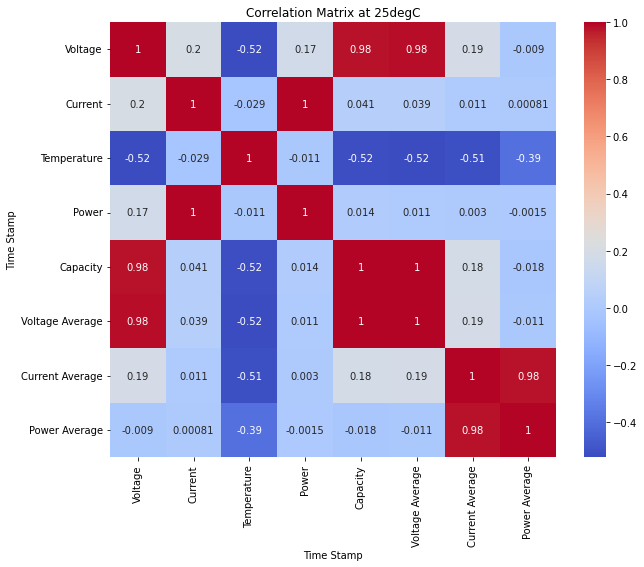

In [10]:

# Create a slider for selecting the temperature
temp_slider = widgets.SelectionSlider(
    options=['-20degC', '-10degC', '0degC', '10degC', '25degC', '40degC'],
    value='25degC',
    description='Temperature:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Function to update the plot based on the selected temperature
def update_plot(change):
    temp = change['new']
    data = temp_datasets[temp]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix at {temp}')
    
    clear_output(wait=True)
    display(temp_slider)
    plt.show()

# Link the slider to the update function
temp_slider.observe(update_plot, names='value')

# Display the slider and the initial plot
display(temp_slider)
update_plot({'new': '25degC'})

In [11]:
cell_type = "lg"
model_type = ""
base_path = '../../'

sys.path.append(base_path)
from training import utils

data_path = base_path + 'datasets/Dataset_Li-ion'

resample_1hz = True
vi_averages = True

In [12]:
charge_cycles = ['Charge']
discharge_cycles = ['Mixed']

n20_temps = ['n20degC']
n20_discharge_cycles = discharge_cycles

n10_temps = ['n10degC']
n10_discharge_cycles = discharge_cycles

temp_0_temps = ['0degC']
temp_0_discharge_cycles = discharge_cycles

temp_10_temps = ['10degC']
temp_10_discharge_cycles = discharge_cycles

temp_25_temps = ['25degC']
temp_25_discharge_cycles = discharge_cycles

temp_40_temps = ['40degC']
temp_40_discharge_cycles = discharge_cycles

n20_files = utils.lg_get_files(data_path,
                               n20_discharge_cycles, 
                               charge_cycles,
                               n20_temps)

n10_files = utils.lg_get_files(data_path,
                               n10_discharge_cycles, 
                               charge_cycles,
                               n10_temps)

temp_0_files = utils.lg_get_files(data_path,
                                  temp_0_discharge_cycles, 
                                  charge_cycles,
                                  temp_0_temps)

temp_10_files = utils.lg_get_files(data_path,
                                   temp_10_discharge_cycles, 
                                   charge_cycles,
                                   temp_10_temps)

temp_25_files = utils.lg_get_files(data_path,
                                   temp_25_discharge_cycles, 
                                   charge_cycles,
                                   temp_25_temps)

temp_40_files = utils.lg_get_files(data_path,
                                   temp_40_discharge_cycles, 
                                   charge_cycles,
                                   temp_40_temps)

dataset_n20, dataset_n20_norm = utils.lg_create_dataset(n20_files,
                                                        n20_discharge_cycles,
                                                        charge_cycles,
                                                        vi_averages, 
                                                        resample_1hz)

dataset_n10, dataset_n10_norm = utils.lg_create_dataset(n10_files,
                                                        n10_discharge_cycles,
                                                        charge_cycles,
                                                        vi_averages, 
                                                        resample_1hz)

dataset_0, dataset_0_norm = utils.lg_create_dataset(temp_0_files, 
                                                    temp_0_discharge_cycles, 
                                                    charge_cycles,
                                                    vi_averages, 
                                                    resample_1hz)

dataset_10, dataset_10_norm = utils.lg_create_dataset(temp_10_files,
                                                      temp_10_discharge_cycles, 
                                                      charge_cycles,
                                                      vi_averages,
                                                      resample_1hz)

dataset_25, dataset_25_norm = utils.lg_create_dataset(temp_25_files,
                                                      temp_25_discharge_cycles, 
                                                      charge_cycles,
                                                      vi_averages, 
                                                      resample_1hz)

dataset_40, dataset_40_norm = utils.lg_create_dataset(temp_40_files,
                                                      temp_40_discharge_cycles, 
                                                      charge_cycles,
                                                      vi_averages, 
                                                      resample_1hz)


../../datasets/Dataset_Li-ion/n20degC/610_Mixed1.csv 45343
../../datasets/Dataset_Li-ion/n20degC/610_Mixed2.csv 43043
../../datasets/Dataset_Li-ion/n20degC/611_Mixed3.csv 45163
../../datasets/Dataset_Li-ion/n20degC/611_Mixed4.csv 46053
../../datasets/Dataset_Li-ion/n20degC/611_Mixed5.csv 45458
../../datasets/Dataset_Li-ion/n20degC/611_Mixed6.csv 44196
../../datasets/Dataset_Li-ion/n20degC/611_Mixed7.csv 40683
../../datasets/Dataset_Li-ion/n20degC/611_Mixed8.csv 46763
../../datasets/Dataset_Li-ion/n10degC/601_Mixed1.csv 62622
../../datasets/Dataset_Li-ion/n10degC/601_Mixed2.csv 65254
../../datasets/Dataset_Li-ion/n10degC/602_Mixed4.csv 65677
../../datasets/Dataset_Li-ion/n10degC/602_Mixed5.csv 60087
../../datasets/Dataset_Li-ion/n10degC/604_Mixed3.csv 55214
../../datasets/Dataset_Li-ion/n10degC/604_Mixed6.csv 55968
../../datasets/Dataset_Li-ion/n10degC/604_Mixed7.csv 55940
../../datasets/Dataset_Li-ion/n10degC/604_Mixed8.csv 67325
../../datasets/Dataset_Li-ion/0degC/589_Mixed1.csv 67312

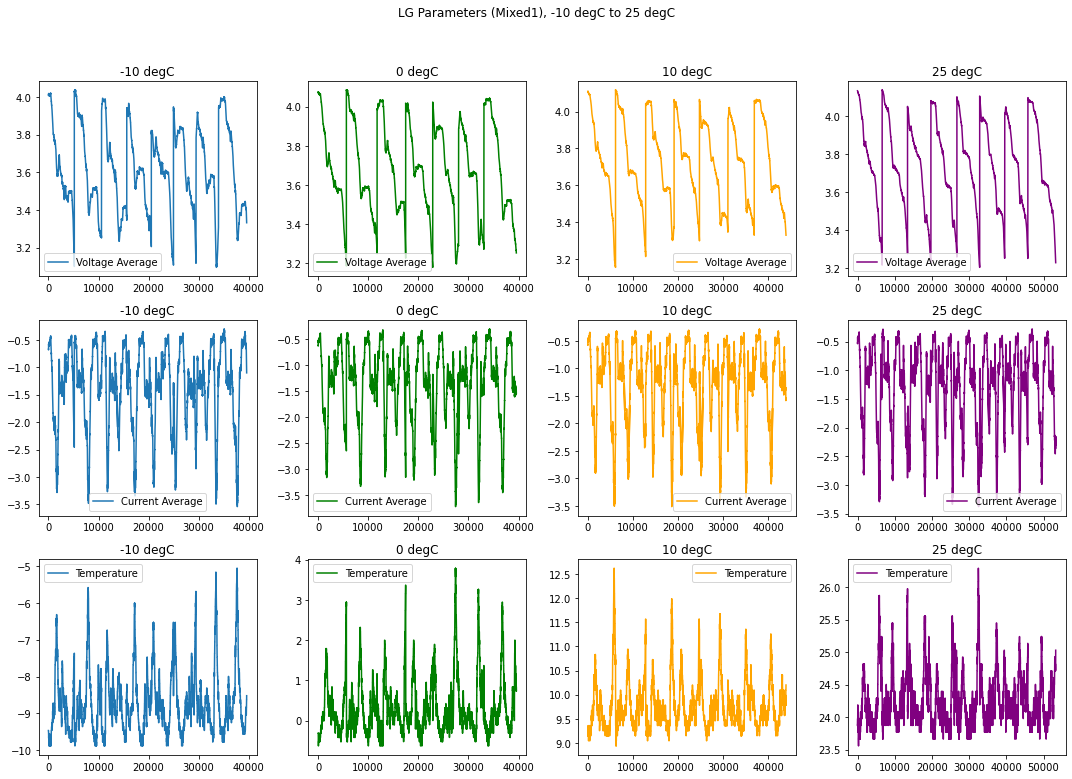

In [13]:
plot_cols = ['Voltage Average', 'Current Average', 'Temperature']

fig, axs = plt.subplots(nrows=len(plot_cols), ncols=4, figsize=(15, 11))
fig.suptitle("LG Parameters (Mixed1), -10 degC to 25 degC")

for i, col in enumerate(plot_cols):
    axs[i, 0].plot(dataset_n10[col], label=f'{col}')
    axs[i, 0].set_title(f'-10 degC')
    axs[i, 0].legend()
    
    axs[i, 1].plot(dataset_0[col], label=f'{col}', color="green")
    axs[i, 1].set_title(f'0 degC')
    axs[i, 1].legend()
    
    axs[i, 2].plot(dataset_10[col], label=f'{col}', color="orange")
    axs[i, 2].set_title(f'10 degC')
    axs[i, 2].legend()
    
    axs[i, 3].plot(dataset_25[col], label=f'{col}', color="purple")
    axs[i, 3].set_title(f'25 degC')
    axs[i, 3].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
